In [2]:
import pickle

In [3]:
import pandas as pd
from sklearn import preprocessing
import sklearn.model_selection as ms
from sklearn import linear_model
import sklearn.metrics as sklm
import numpy as np
import numpy.random as nr
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
import math
import seaborn as sns

%matplotlib inline


In [4]:
loaded_model=pickle.load(open('Tmax_PI1.sav','rb'))

# Tmax_PI predictions for Mowry Formation

## Well_321635

In [5]:
Well_321635=pd.read_csv('Well_321635.csv')

In [6]:
Well_321635.head()

,DEPT,GR,ILD,DPHI,ITT,NPHI,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,10800.0,88.247012,41.201525,6.506986,64.211577,9.201597,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10800.5,89.043825,41.201525,6.806387,65.608782,8.802395,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10801.0,101.792829,35.524418,7.005988,67.804391,8.902196,NaN,NaN,NaN,NaN,NaN,NaN,2,3,5,6,4
3,10801.5,112.577278,32.047310,7.005988,69.564027,10.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10802.0,124.418083,26.903119,6.806387,73.233141,14.291417,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
Well_321635.drop(['ITT','NPHI'],axis=1,inplace=True)

In [8]:
Well_321635.columns

Index(['DEPT', 'GR', 'ILD', 'DPHI', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12',
       'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16'],
      dtype='object')

In [9]:
column_name=['GR','ILD','DPHI','DEPT']
Well_321635=Well_321635.reindex(columns=column_name)

In [10]:
Well_321635.head()

,GR,ILD,DPHI,DEPT
0,88.247012,41.201525,6.506986,10800.0
1,89.043825,41.201525,6.806387,10800.5
2,101.792829,35.524418,7.005988,10801.0
3,112.577278,32.047310,7.005988,10801.5
4,124.418083,26.903119,6.806387,10802.0


In [11]:
X=Well_321635

In [12]:
Well_321635.dropna(axis=0,inplace=True)

In [13]:
X=Well_321635

In [9]:
scaler = preprocessing.StandardScaler()

In [15]:
X=scaler.fit_transform(X)

In [16]:
Well_321635_Tmax_PI=loaded_model.predict(X)

In [17]:
Well_321635_Tmax_PI

array([[4.467600e+02, 2.820000e-01],
       [4.408700e+02, 2.714000e-01],
       [4.421300e+02, 2.755000e-01],
       ...,
       [3.565633e+02, 3.131000e-01],
       [3.565933e+02, 3.137000e-01],
       [3.565833e+02, 3.142000e-01]])

In [18]:
d=pd.DataFrame(Well_321635_Tmax_PI,columns=['Tmax','PI'])

In [19]:
d

,Tmax,PI
0,446.7600,0.2820
1,440.8700,0.2714
2,442.1300,0.2755
3,444.1900,0.2397
4,445.2400,0.2209
...,...,...
1996,360.9126,0.3251
1997,356.5933,0.3137
1998,356.5633,0.3131
1999,356.5933,0.3137


In [21]:
loaded_model1=pickle.load(open('TOC_modelupdated.sav','rb'))
Well_321635_TOC=loaded_model1.predict(X)
Well_321635['TOC_Predicted']=Well_321635_TOC

In [22]:
Well_321635prepared=pd.concat([Well_321635,d],axis=1,)

In [23]:
Well_321635prepared

,GR,ILD,DPHI,DEPT,TOC_Predicted,Tmax,PI
0,88.247012,41.201525,6.506986,10800.0,2.277839,446.7600,0.2820
1,89.043825,41.201525,6.806387,10800.5,1.035035,440.8700,0.2714
2,101.792829,35.524418,7.005988,10801.0,1.190481,442.1300,0.2755
3,112.577278,32.047310,7.005988,10801.5,1.398893,444.1900,0.2397
4,124.418083,26.903119,6.806387,10802.0,1.601458,445.2400,0.2209
...,...,...,...,...,...,...,...
1996,148.473214,4.800779,5.608782,11798.0,1.600452,360.9126,0.3251
1997,147.186164,5.037094,4.311377,11798.5,1.935553,356.5933,0.3137
1998,144.842468,6.578587,4.510978,11799.0,1.866451,356.5633,0.3131
1999,146.357505,6.578587,4.510978,11799.5,1.938590,356.5933,0.3137


In [132]:
Well_321635prepared.to_csv(r'C:\Users\eobasi\OneDrive - University of Wyoming\Desktop\PowderRiverBasin Project work\Geologicalsweetspotmap\Well_321635prepared.csv',index=False,header=True)

### Graphing TOC vs Depth

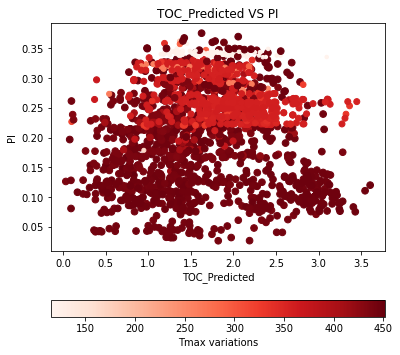

In [35]:
plt.figure(figsize=(6,6))
plt.scatter('TOC_Predicted','PI',data=Well_321635prepared, c=Well_321635prepared['Tmax'],cmap='Reds',alpha=1,s=Well_321635prepared['Tmax']*0.1)
plt.colorbar(label="Tmax variations", orientation="horizontal")
#plt.ylim(11900,10600)
plt.xlabel('TOC_Predicted')
plt.ylabel('PI')
plt.title('TOC_Predicted VS PI')
plt.show()

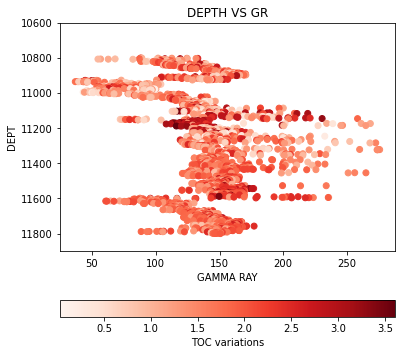

In [25]:
plt.figure(figsize=(6,6))
plt.scatter('GR','DEPT',data=Well_321635, c=Well_321635['TOC_Predicted'],cmap='Reds',alpha=1)
plt.colorbar(label="TOC variations", orientation="horizontal")
plt.ylim(11900,10600)
plt.xlabel('GAMMA RAY')
plt.ylabel('DEPT')
plt.title('DEPTH VS GR')
plt.show()

In [26]:
Well_321635['TOC_Predicted'].max()

3.6069743633270264

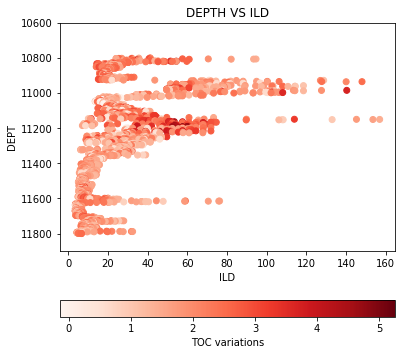

In [26]:
plt.figure(figsize=(6,6))
plt.scatter('ILD','DEPT',data=Well_321635, c=Well_321635['TOC_Predicted'],cmap='Reds',alpha=1)
plt.colorbar(label="TOC variations", orientation="horizontal")
plt.ylim(11900,10600)
plt.xlabel('ILD')
plt.ylabel('DEPT')
plt.title('DEPTH VS ILD')
plt.show()

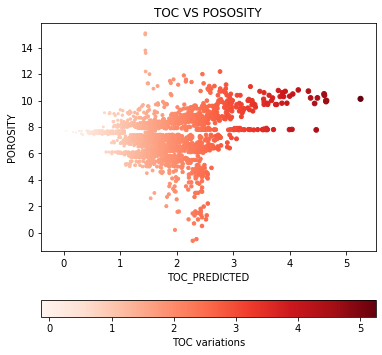

In [27]:
plt.figure(figsize=(6,6))
plt.scatter('TOC_Predicted','DPHI',data=Well_321635, c=Well_321635['TOC_Predicted'],cmap='Reds',alpha=1.0,s=Well_321635['TOC_Predicted']*5)
plt.colorbar(label="TOC variations", orientation="horizontal")
#plt.xlim(11900,10600)
plt.xlabel('TOC_PREDICTED')
plt.ylabel('POROSITY')
plt.title('TOC VS POSOSITY')
plt.show()

## Well_3328134

In [38]:
Well_3328134=pd.read_csv('Well_3328134.csv')

In [40]:
Well_3328134.head()

,DEPT,GR,NPHI,TNPH,NPOR,DPHZ,ATRT
0,1539.0,41.1873,0.8626,1.3726,1.3513,0.6784,23.9452
1,1539.5,41.1873,0.8626,1.3726,1.3513,0.6784,23.9452
2,1540.0,41.1873,0.8626,1.3726,1.3513,0.6784,23.9452
3,1540.5,30.5565,0.7571,1.0699,1.0254,0.6024,24.0703
4,1541.0,29.7880,0.7525,0.8571,0.8849,0.5223,24.2592


In [41]:
Well_3328134.drop(['NPHI','TNPH','NPOR'],axis=1,inplace=True)

In [42]:
column_name=['GR','ATRT','DPHZ','DEPT']
Well_3328134=Well_3328134.reindex(columns=column_name)


In [43]:
Well_3328134.head()
Well_3328134['DPHZ']=Well_3328134.DPHZ.apply(lambda x: x*100)

In [44]:
Well_3328134.loc[Well_3328134['DEPT']>10118].head(20)

,GR,ATRT,DPHZ,DEPT
17159,146.2057,3.9927,6.10,10118.5
17160,150.5122,3.7489,7.58,10119.0
17161,155.7768,3.5211,8.27,10119.5
17162,156.3195,3.4219,9.39,10120.0
17163,166.0994,3.4308,9.75,10120.5
17164,168.5943,3.5243,11.10,10121.0
17165,175.3673,3.6495,11.59,10121.5
17166,170.5556,3.7228,13.32,10122.0
17167,171.1794,3.6790,17.60,10122.5
17168,168.2398,3.5277,22.05,10123.0


In [45]:
Well_3328134.dropna(axis=0,inplace=True)
X=Well_3328134
X=scaler.fit_transform(X)
Well_3328134_TOC=loaded_model1.predict(X)
Well_3328134['TOC_Predicted']=Well_3328134_TOC
Well_3328134.head()

,GR,ATRT,DPHZ,DEPT,TOC_Predicted
0,41.1873,23.9452,67.84,1539.0,1.817251
1,41.1873,23.9452,67.84,1539.5,1.817251
2,41.1873,23.9452,67.84,1540.0,1.817251
3,30.5565,24.0703,60.24,1540.5,1.817251
4,29.7880,24.2592,52.23,1541.0,1.817251


In [50]:
Well_3328134_Tmax_PI=loaded_model.predict(X)
e=pd.DataFrame(Well_3328134_Tmax_PI,columns=['Tmax','PI'])
Well_3328134prepared=pd.concat([Well_3328134,e],axis=1,)


In [51]:
Well_3328134prepared

,GR,ATRT,DPHZ,DEPT,TOC_Predicted,Tmax,PI
0,41.1873,23.9452,67.84,1539.0,1.817251,445.65,0.2258
1,41.1873,23.9452,67.84,1539.5,1.817251,445.65,0.2258
2,41.1873,23.9452,67.84,1540.0,1.817251,445.65,0.2258
3,30.5565,24.0703,60.24,1540.5,1.817251,445.65,0.2258
4,29.7880,24.2592,52.23,1541.0,1.817251,445.65,0.2258
...,...,...,...,...,...,...,...
18138,146.8852,7.2604,57251.42,10608.0,1.567203,449.60,0.3421
18139,146.8852,7.2628,57251.42,10608.5,1.567203,449.60,0.3421
18140,146.8852,7.3166,57251.42,10609.0,1.567203,449.60,0.3421
18141,146.8852,7.4480,57251.42,10609.5,1.547927,449.60,0.3421


In [133]:
Well_3328134prepared.to_csv(r'C:\Users\eobasi\OneDrive - University of Wyoming\Desktop\PowderRiverBasin Project work\Geologicalsweetspotmap\Well_3328134prepared.csv',index=False,header=True)

## Well_3328167

In [92]:
Well_3328167=pd.read_csv('Well_3328167.csv')
Well_3328167.head(10)

,DEPT,GR,NPHI,DPHZ,NPOR,SPHI,AF90,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,2447.0,61.7954,0.8937,0.3654,0.7645,-0.0152,8.3653,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2447.5,58.2705,1.0155,0.3654,0.9272,-0.0193,8.3653,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2448.0,49.1976,1.0696,0.3654,1.1589,0.0038,8.3653,NaN,NaN,NaN,NaN,NaN,2,7,3,NaN
3,2448.5,44.7531,0.9945,0.3654,1.5709,-0.0038,8.3653,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2449.0,39.6953,0.9050,0.3654,1.2787,-0.0013,8.3653,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2449.5,37.5497,0.9307,0.3654,1.0983,-0.0124,8.3653,NaN,NaN,NaN,NaN,NaN,GR,ILD,NPHI,ITT
6,2450.0,41.5346,0.9052,0.3654,1.1075,-0.0174,8.3653,NaN,NaN,NaN,NaN,10465.2,137.3373,5.4714,0.2282,#VALUE!
7,2450.5,48.2781,0.8348,0.3654,0.8812,-0.0162,8.3653,NaN,NaN,NaN,NaN,10472.9,136.4009,5.4822,0.2178,#VALUE!
8,2451.0,56.4624,0.6178,0.3654,0.5995,-0.0067,8.3653,NaN,NaN,NaN,NaN,10486.7,102.8419,5.2902,0.2466,#VALUE!
9,2451.5,59.8341,0.5285,0.3654,0.3995,-0.0100,8.3653,NaN,NaN,NaN,NaN,10501.2,111.211,7.2588,0.2133,#VALUE!


In [93]:
Well_3328167.drop(['NPOR','NPHI','DPHZ'],axis=1,inplace=True)

In [94]:
column_name=['GR','AF90','SPHI','DEPT']
Well_3328167=Well_3328167.reindex(columns=column_name)
Well_3328167.head()

,GR,AF90,SPHI,DEPT
0,61.7954,8.3653,-0.0152,2447.0
1,58.2705,8.3653,-0.0193,2447.5
2,49.1976,8.3653,0.0038,2448.0
3,44.7531,8.3653,-0.0038,2448.5
4,39.6953,8.3653,-0.0013,2449.0


In [95]:
Well_3328167.dropna(axis=0,inplace=True)
Well_3328167=Well_3328167[Well_3328167['SPHI']>0]
Well_3328167.reset_index(drop=True,inplace=True)

In [96]:
Well_3328167['SPHI']=Well_3328167.SPHI.apply(lambda x: x*100)

In [97]:
Well_3328167

,GR,AF90,SPHI,DEPT
0,49.1976,8.3653,0.38,2448.0
1,65.1370,8.3653,0.06,2452.5
2,65.9035,8.3653,1.11,2453.0
3,67.8960,8.3653,0.87,2453.5
4,62.9914,8.3653,2.37,2454.0
...,...,...,...,...
17801,114.2891,15.9590,6.46,11387.0
17802,113.5315,18.3895,6.46,11387.5
17803,113.8861,21.0500,6.46,11388.0
17804,111.0891,23.4340,6.46,11388.5


In [98]:
X=Well_3328167
X=scaler.fit_transform(X)
Well_3328167_TOC=loaded_model1.predict(X)
Well_3328167['TOC_Predicted']=Well_3328167_TOC


In [99]:
Well_3328167

,GR,AF90,SPHI,DEPT,TOC_Predicted
0,49.1976,8.3653,0.38,2448.0,1.795249
1,65.1370,8.3653,0.06,2452.5,1.737051
2,65.9035,8.3653,1.11,2453.0,1.748339
3,67.8960,8.3653,0.87,2453.5,1.746624
4,62.9914,8.3653,2.37,2454.0,1.706653
...,...,...,...,...,...
17801,114.2891,15.9590,6.46,11387.0,2.106352
17802,113.5315,18.3895,6.46,11387.5,2.034711
17803,113.8861,21.0500,6.46,11388.0,2.034711
17804,111.0891,23.4340,6.46,11388.5,2.018255


In [100]:
Well_3328167_Tmax_PI=loaded_model.predict(X)
f=pd.DataFrame(Well_3328167_Tmax_PI,columns=['Tmax','PI'])
Well_3328167prepared=pd.concat([Well_3328167,f],axis=1,)

Well_3328167prepared.head()

,GR,AF90,SPHI,DEPT,TOC_Predicted,Tmax,PI
0,49.1976,8.3653,0.38,2448.0,1.795249,444.936667,0.2103
1,65.1370,8.3653,0.06,2452.5,1.737051,444.786667,0.2088
2,65.9035,8.3653,1.11,2453.0,1.748339,444.736667,0.2070
3,67.8960,8.3653,0.87,2453.5,1.746624,444.916667,0.2070
4,62.9914,8.3653,2.37,2454.0,1.706653,444.976667,0.2119


In [134]:
Well_3328167prepared.to_csv(r'C:\Users\eobasi\OneDrive - University of Wyoming\Desktop\PowderRiverBasin Project work\Geologicalsweetspotmap\Well_3328167prepared.csv',index=False,header=True)

## Well_3723786

In [101]:
Well_3723786=pd.read_csv('Well_3723786.csv')
Well_3723786.head()

,DEPT,GR,ILD,DPHI
0,10400.0,99.874784,4.562248,13.061430
1,10400.5,99.586926,4.562248,13.061430
2,10401.0,98.193486,4.381870,10.402820
3,10401.5,96.411264,4.120153,8.509567
4,10402.0,97.237545,4.120153,8.187311


In [102]:
column_name=['GR','ILD','DPHI','DEPT']
Well_3723786=Well_3723786.reindex(columns=column_name)
Well_3723786.head()

,GR,ILD,DPHI,DEPT
0,99.874784,4.562248,13.061430,10400.0
1,99.586926,4.562248,13.061430,10400.5
2,98.193486,4.381870,10.402820,10401.0
3,96.411264,4.120153,8.509567,10401.5
4,97.237545,4.120153,8.187311,10402.0


In [103]:
Well_3723786.isnull().any()

GR      False
ILD     False
DPHI    False
DEPT    False
dtype: bool

In [104]:
X=Well_3723786
X=scaler.fit_transform(X)
Well_3723786_TOC=loaded_model1.predict(X)
Well_3723786['TOC_Predicted']=Well_3723786_TOC
Well_3723786.head()

,GR,ILD,DPHI,DEPT,TOC_Predicted
0,99.874784,4.562248,13.061430,10400.0,2.914997
1,99.586926,4.562248,13.061430,10400.5,2.916229
2,98.193486,4.381870,10.402820,10401.0,1.419099
3,96.411264,4.120153,8.509567,10401.5,1.554012
4,97.237545,4.120153,8.187311,10402.0,2.156385


In [105]:
Well_3723786_Tmax_PI=loaded_model.predict(X)
g=pd.DataFrame(Well_3723786_Tmax_PI,columns=['Tmax','PI'])
Well_3723786prepared=pd.concat([Well_3723786,g],axis=1,)

Well_3723786prepared.head()

,GR,ILD,DPHI,DEPT,TOC_Predicted,Tmax,PI
0,99.874784,4.562248,13.061430,10400.0,2.914997,444.46,0.1259
1,99.586926,4.562248,13.061430,10400.5,2.916229,444.49,0.1259
2,98.193486,4.381870,10.402820,10401.0,1.419099,444.31,0.1669
3,96.411264,4.120153,8.509567,10401.5,1.554012,443.86,0.1666
4,97.237545,4.120153,8.187311,10402.0,2.156385,443.99,0.1667


In [135]:
Well_3723786prepared.to_csv(r'C:\Users\eobasi\OneDrive - University of Wyoming\Desktop\PowderRiverBasin Project work\Geologicalsweetspotmap\Well_3723786prepared.csv',index=False,header=True)

## Well_4321132

In [106]:
Well_4321132=pd.read_csv('Well_4321132.csv')
Well_4321132.head()

,DEPT,GR,M2RX,PORZC,TT
0,2022.0,40.769,1.949,57.845,721.098
1,2022.5,41.521,1.428,57.574,721.062
2,2023.0,40.782,1.207,57.557,721.026
3,2023.5,40.099,1.554,57.996,720.990
4,2024.0,39.934,5.825,58.753,720.954


In [107]:
column_name=['GR','M2RX','PORZC','DEPT','TT']
Well_4321132=Well_4321132.reindex(columns=column_name)
Well_4321132.head()

,GR,M2RX,PORZC,DEPT,TT
0,40.769,1.949,57.845,2022.0,721.098
1,41.521,1.428,57.574,2022.5,721.062
2,40.782,1.207,57.557,2023.0,721.026
3,40.099,1.554,57.996,2023.5,720.990
4,39.934,5.825,58.753,2024.0,720.954


In [108]:
Well_4321132.drop('TT',axis=1,inplace=True)

In [109]:
X=Well_4321132
X=scaler.fit_transform(X)
Well_4321132_TOC=loaded_model1.predict(X)
Well_4321132['TOC_Predicted']=Well_4321132_TOC
Well_4321132.head()

,GR,M2RX,PORZC,DEPT,TOC_Predicted
0,40.769,1.949,57.845,2022.0,1.786511
1,41.521,1.428,57.574,2022.5,1.823080
2,40.782,1.207,57.557,2023.0,1.848344
3,40.099,1.554,57.996,2023.5,1.823080
4,39.934,5.825,58.753,2024.0,1.797490


In [110]:
Well_4321132_Tmax_PI=loaded_model.predict(X)
h=pd.DataFrame(Well_4321132_Tmax_PI,columns=['Tmax','PI'])
Well_4321132prepared=pd.concat([Well_4321132,h],axis=1,)

Well_4321132prepared.head()

,GR,M2RX,PORZC,DEPT,TOC_Predicted,Tmax,PI
0,40.769,1.949,57.845,2022.0,1.786511,445.969007,0.2201
1,41.521,1.428,57.574,2022.5,1.823080,445.969007,0.2201
2,40.782,1.207,57.557,2023.0,1.848344,445.999007,0.2213
3,40.099,1.554,57.996,2023.5,1.823080,445.969007,0.2201
4,39.934,5.825,58.753,2024.0,1.797490,446.119007,0.2290


In [136]:
Well_4321132prepared.to_csv(r'C:\Users\eobasi\OneDrive - University of Wyoming\Desktop\PowderRiverBasin Project work\Geologicalsweetspotmap\Well_4321132prepared.csv',index=False,header=True)

### Well_4520905

In [111]:
Well_4520905=pd.read_csv('Well_4520905.csv')
Well_4520905.head()

,DEPT,GR,RHOB,ITT,ILD,POROSITY,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,7800.0,140.319361,2.476024,86.956088,4.984635,10.544001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,7800.5,143.113773,2.464036,87.355289,4.984635,11.270548,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7801.0,147.105788,2.448052,87.554890,4.893746,12.239276,NaN,NaN,NaN,NaN,NaN,NaN,2.0,5.0,3.0,4.0
3,7801.5,150.707121,2.437380,87.554890,4.871912,12.886037,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,7802.0,152.077373,2.406450,87.654691,4.717297,14.760624,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [112]:
Well_4520905=Well_4520905[['GR','ILD','POROSITY','DEPT']]
Well_4520905.head()

,GR,ILD,POROSITY,DEPT
0,140.319361,4.984635,10.544001,7800.0
1,143.113773,4.984635,11.270548,7800.5
2,147.105788,4.893746,12.239276,7801.0
3,150.707121,4.871912,12.886037,7801.5
4,152.077373,4.717297,14.760624,7802.0


In [113]:
Well_4520905.isnull().any()

GR           True
ILD         False
POROSITY    False
DEPT        False
dtype: bool

In [114]:
Well_4520905.dropna(axis=0,inplace=True)

In [115]:
X=Well_4520905
X=scaler.fit_transform(X)
Well_4520905_TOC=loaded_model1.predict(X)
Well_4520905['TOC_Predicted']=Well_4520905_TOC
Well_4520905.head()

,GR,ILD,POROSITY,DEPT,TOC_Predicted
0,140.319361,4.984635,10.544001,7800.0,1.376094
1,143.113773,4.984635,11.270548,7800.5,3.316476
2,147.105788,4.893746,12.239276,7801.0,1.981997
3,150.707121,4.871912,12.886037,7801.5,1.812068
4,152.077373,4.717297,14.760624,7802.0,3.481046


In [116]:
Well_4520905_Tmax_PI=loaded_model.predict(X)
i=pd.DataFrame(Well_4520905_Tmax_PI,columns=['Tmax','PI'])
Well_4520905prepared=pd.concat([Well_4520905,i],axis=1,)

Well_4520905prepared.head()

,GR,ILD,POROSITY,DEPT,TOC_Predicted,Tmax,PI
0,140.319361,4.984635,10.544001,7800.0,1.376094,438.42,0.2088
1,143.113773,4.984635,11.270548,7800.5,3.316476,437.43,0.1778
2,147.105788,4.893746,12.239276,7801.0,1.981997,437.40,0.1747
3,150.707121,4.871912,12.886037,7801.5,1.812068,437.40,0.1762
4,152.077373,4.717297,14.760624,7802.0,3.481046,437.44,0.1767


In [137]:
Well_4520905prepared.to_csv(r'C:\Users\eobasi\OneDrive - University of Wyoming\Desktop\PowderRiverBasin Project work\Geologicalsweetspotmap\Well_4520905prepared.csv',index=False,header=True)

## Well_521139

In [128]:
Well_521139=pd.read_csv('Well_521139Updated.csv')
Well_521139.head()

,GR,ILD,Porosity,DEPT
0,119.520000,18.897192,8.303818,9500.0
1,120.800000,19.668823,8.424908,9500.5
2,120.160000,20.853300,8.485454,9501.0
3,119.831573,21.231866,8.152670,9501.5
4,119.446507,21.106902,7.325552,9502.0


In [130]:
X=Well_521139
X=scaler.fit_transform(X)
Well_521139_TOC=loaded_model1.predict(X)
Well_521139['TOC_Predicted']=Well_521139_TOC
Well_521139.head()

,GR,ILD,Porosity,DEPT,TOC_Predicted
0,119.520000,18.897192,8.303818,9500.0,1.803289
1,120.800000,19.668823,8.424908,9500.5,1.804433
2,120.160000,20.853300,8.485454,9501.0,1.804005
3,119.831573,21.231866,8.152670,9501.5,2.058887
4,119.446507,21.106902,7.325552,9502.0,2.200634


In [131]:
Well_521139_Tmax_PI=loaded_model.predict(X)
j=pd.DataFrame(Well_521139_Tmax_PI,columns=['Tmax','PI'])
Well_521139prepared=pd.concat([Well_521139,j],axis=1,)

Well_521139prepared.head()

,GR,ILD,Porosity,DEPT,TOC_Predicted,Tmax,PI
0,119.520000,18.897192,8.303818,9500.0,1.803289,445.7400,0.3064
1,120.800000,19.668823,8.424908,9500.5,1.804433,230.6856,0.1538
2,120.160000,20.853300,8.485454,9501.0,1.804005,230.6756,0.1512
3,119.831573,21.231866,8.152670,9501.5,2.058887,445.6000,0.3155
4,119.446507,21.106902,7.325552,9502.0,2.200634,445.4300,0.3259


In [138]:
Well_521139prepared.to_csv(r'C:\Users\eobasi\OneDrive - University of Wyoming\Desktop\PowderRiverBasin Project work\Geologicalsweetspotmap\Well_521139prepared.csv',index=False,header=True)

## Well_520892

In [139]:
Well_520892=pd.read_csv('Well_520892Updated.csv')
Well_520892.head()

,GR,ILD,Porosity,DEPT
0,140.00,108.067729,37.486327,5600.0
1,139.36,112.051793,37.486327,5600.5
2,139.36,116.035857,37.486327,5601.0
3,140.00,120.019920,36.759237,5601.5
4,140.32,125.000000,35.159640,5602.0


In [140]:
X=Well_520892
X=scaler.fit_transform(X)
Well_520892_TOC=loaded_model1.predict(X)
Well_520892['TOC_Predicted']=Well_520892_TOC
Well_520892.head()

,GR,ILD,Porosity,DEPT,TOC_Predicted
0,140.00,108.067729,37.486327,5600.0,2.694072
1,139.36,112.051793,37.486327,5600.5,2.717287
2,139.36,116.035857,37.486327,5601.0,2.717287
3,140.00,120.019920,36.759237,5601.5,3.890832
4,140.32,125.000000,35.159640,5602.0,2.319761


In [141]:
Well_520892_Tmax_PI=loaded_model.predict(X)
j=pd.DataFrame(Well_520892_Tmax_PI,columns=['Tmax','PI'])
Well_520892prepared=pd.concat([Well_520892,j],axis=1,)

Well_520892prepared.head()

,GR,ILD,Porosity,DEPT,TOC_Predicted,Tmax,PI
0,140.00,108.067729,37.486327,5600.0,2.694072,202.9578,0.2858
1,139.36,112.051793,37.486327,5600.5,2.717287,202.9378,0.2842
2,139.36,116.035857,37.486327,5601.0,2.717287,202.9378,0.2842
3,140.00,120.019920,36.759237,5601.5,3.890832,202.9578,0.2858
4,140.32,125.000000,35.159640,5602.0,2.319761,202.9578,0.2858


In [142]:
Well_520892prepared.to_csv(r'C:\Users\eobasi\OneDrive - University of Wyoming\Desktop\PowderRiverBasin Project work\Geologicalsweetspotmap\Well_520892prepared.csv',index=False,header=True)

## Well_521469

In [143]:
Well_521469=pd.read_csv('Well_521469Updated.csv')
Well_521469.head()


,GR,ILD,porosity,DEPT
0,224.409394,9.55,18.693428,8900.0
1,210.007295,9.95,22.868768,8900.5
2,197.066064,10.35,29.615839,8901.0
3,203.398188,10.45,21.280008,8901.5
4,154.193642,10.85,8.727636,8902.0


In [144]:
X=Well_521469
X=scaler.fit_transform(X)
Well_521469_TOC=loaded_model1.predict(X)
Well_521469['TOC_Predicted']=Well_521469_TOC
Well_521469.head()

,GR,ILD,porosity,DEPT,TOC_Predicted
0,224.409394,9.55,18.693428,8900.0,2.650893
1,210.007295,9.95,22.868768,8900.5,2.183877
2,197.066064,10.35,29.615839,8901.0,2.264146
3,203.398188,10.45,21.280008,8901.5,2.149542
4,154.193642,10.85,8.727636,8902.0,1.745353


In [145]:
Well_521469_Tmax_PI=loaded_model.predict(X)
j=pd.DataFrame(Well_521469_Tmax_PI,columns=['Tmax','PI'])
Well_521469prepared=pd.concat([Well_521469,j],axis=1,)

Well_521469prepared.head()

,GR,ILD,porosity,DEPT,TOC_Predicted,Tmax,PI
0,224.409394,9.55,18.693428,8900.0,2.650893,439.4008,0.2637
1,210.007295,9.95,22.868768,8900.5,2.183877,439.0708,0.2864
2,197.066064,10.35,29.615839,8901.0,2.264146,439.1208,0.2915
3,203.398188,10.45,21.280008,8901.5,2.149542,439.1608,0.2776
4,154.193642,10.85,8.727636,8902.0,1.745353,444.0400,0.2687


In [146]:
Well_521469prepared.to_csv(r'C:\Users\eobasi\OneDrive - University of Wyoming\Desktop\PowderRiverBasin Project work\Geologicalsweetspotmap\Well_521469prepared.csv',index=False,header=True)

## Well_521474

In [157]:
Well_521474=pd.read_csv('Well_521474Updated1 .csv')
Well_521474.head()

,GR,ILD,Porosity,DEPT
0,113.346614,6.85,5.134596,8800.0
1,114.541833,6.75,5.054835,8800.5
2,115.737052,6.65,4.895314,8801.0
3,116.932271,6.55,4.576271,8801.5
4,117.330677,6.45,3.619143,8802.0


In [158]:
Well_521474.dropna(axis=0,inplace=True)

In [159]:
X=Well_521474
X=scaler.fit_transform(X)
Well_521474_TOC=loaded_model1.predict(X)
Well_521474['TOC_Predicted']=Well_521474_TOC
Well_521474.head()

,GR,ILD,Porosity,DEPT,TOC_Predicted
0,113.346614,6.85,5.134596,8800.0,1.261848
1,114.541833,6.75,5.054835,8800.5,1.077333
2,115.737052,6.65,4.895314,8801.0,1.507138
3,116.932271,6.55,4.576271,8801.5,1.436487
4,117.330677,6.45,3.619143,8802.0,2.028453


In [160]:
Well_521474_Tmax_PI=loaded_model.predict(X)
j=pd.DataFrame(Well_521474_Tmax_PI,columns=['Tmax','PI'])
Well_521474prepared=pd.concat([Well_521474,j],axis=1,)

Well_521474prepared.head()

,GR,ILD,Porosity,DEPT,TOC_Predicted,Tmax,PI
0,113.346614,6.85,5.134596,8800.0,1.261848,446.451667,0.2525
1,114.541833,6.75,5.054835,8800.5,1.077333,446.610556,0.2528
2,115.737052,6.65,4.895314,8801.0,1.507138,446.520556,0.2548
3,116.932271,6.55,4.576271,8801.5,1.436487,132.759833,0.3420
4,117.330677,6.45,3.619143,8802.0,2.028453,203.218633,0.3234


In [161]:
Well_521474prepared.to_csv(r'C:\Users\eobasi\OneDrive - University of Wyoming\Desktop\PowderRiverBasin Project work\Geologicalsweetspotmap\Well_521474prepared.csv',index=False,header=True)

## Well_522981

In [163]:
Well_522981=pd.read_csv('Well_522981Updated.csv')
Well_522981.head()

,GR,ILD,Porosity,DEPT
0,106.813627,262.838643,14.946543,7700.0
1,102.404810,295.580475,14.946543,7700.5
2,98.797595,333.093322,15.528215,7701.0
3,97.179640,354.210257,16.098830,7701.5
4,99.171293,365.856079,16.853593,7702.0


In [165]:
Well_522981.dropna(axis=0,inplace=True)

In [166]:
X=Well_522981
X=scaler.fit_transform(X)
Well_522981_TOC=loaded_model1.predict(X)
Well_522981['TOC_Predicted']=Well_522981_TOC
Well_522981.head()

,GR,ILD,Porosity,DEPT,TOC_Predicted
0,106.813627,262.838643,14.946543,7700.0,1.613798
1,102.404810,295.580475,14.946543,7700.5,1.972868
2,98.797595,333.093322,15.528215,7701.0,1.796239
3,97.179640,354.210257,16.098830,7701.5,1.786732
4,99.171293,365.856079,16.853593,7702.0,1.622952


In [167]:
Well_522981_Tmax_PI=loaded_model.predict(X)
j=pd.DataFrame(Well_522981_Tmax_PI,columns=['Tmax','PI'])
Well_522981prepared=pd.concat([Well_522981,j],axis=1,)

Well_522981prepared.head()

,GR,ILD,Porosity,DEPT,TOC_Predicted,Tmax,PI
0,106.813627,262.838643,14.946543,7700.0,1.613798,445.179881,0.1934
1,102.404810,295.580475,14.946543,7700.5,1.972868,445.219881,0.1940
2,98.797595,333.093322,15.528215,7701.0,1.796239,445.219881,0.1938
3,97.179640,354.210257,16.098830,7701.5,1.786732,444.979881,0.2011
4,99.171293,365.856079,16.853593,7702.0,1.622952,445.164881,0.1932


In [168]:
Well_522981prepared.to_csv(r'C:\Users\eobasi\OneDrive - University of Wyoming\Desktop\PowderRiverBasin Project work\Geologicalsweetspotmap\Well_522981prepared.csv',index=False,header=True)

## Well_524055

In [172]:
Well_524055=pd.read_csv('Well_524055Updated.csv')
Well_524055.head()

,GR,ILD,Porosity,DEPT
0,145.000000,440.5,5.963442,8300.0
1,145.000000,438.5,6.267079,8300.5
2,143.800000,397.5,6.267079,8301.0
3,142.324781,386.5,6.107975,8301.5
4,141.921888,372.5,6.510150,8302.0


In [173]:
Well_524055.dropna(axis=0,inplace=True)

In [174]:
X=Well_524055
X=scaler.fit_transform(X)
Well_524055_TOC=loaded_model1.predict(X)
Well_524055['TOC_Predicted']=Well_524055_TOC
Well_524055.head()

,GR,ILD,Porosity,DEPT,TOC_Predicted
0,145.000000,440.5,5.963442,8300.0,1.524464
1,145.000000,438.5,6.267079,8300.5,2.377762
2,143.800000,397.5,6.267079,8301.0,2.452037
3,142.324781,386.5,6.107975,8301.5,1.928884
4,141.921888,372.5,6.510150,8302.0,1.818702


In [175]:
Well_524055_Tmax_PI=loaded_model.predict(X)
j=pd.DataFrame(Well_524055_Tmax_PI,columns=['Tmax','PI'])
Well_524055prepared=pd.concat([Well_524055,j],axis=1,)

Well_524055prepared.head()

,GR,ILD,Porosity,DEPT,TOC_Predicted,Tmax,PI
0,145.000000,440.5,5.963442,8300.0,1.524464,445.38,0.2927
1,145.000000,438.5,6.267079,8300.5,2.377762,445.46,0.3202
2,143.800000,397.5,6.267079,8301.0,2.452037,445.46,0.3206
3,142.324781,386.5,6.107975,8301.5,1.928884,445.28,0.2928
4,141.921888,372.5,6.510150,8302.0,1.818702,445.50,0.3137


In [176]:
Well_524055prepared.to_csv(r'C:\Users\eobasi\OneDrive - University of Wyoming\Desktop\PowderRiverBasin Project work\Geologicalsweetspotmap\Well_524055prepared.csv',index=False,header=True)

## Well_525566

In [177]:
Well_525566=pd.read_csv('Well_525566Updated.csv')
Well_525566.head()

,GR,ILD,Porosity,DEPT
0,145.000000,440.5,7.642666,8300.0
1,145.000000,438.5,7.940882,8300.5
2,143.800000,397.5,7.940882,8301.0
3,142.324781,386.5,7.784618,8301.5
4,141.921888,372.5,8.179611,8302.0


In [178]:
Well_525566.dropna(axis=0,inplace=True)

In [179]:
X=Well_525566
X=scaler.fit_transform(X)
Well_525566_TOC=loaded_model1.predict(X)
Well_525566['TOC_Predicted']=Well_525566_TOC
Well_525566.head()

,GR,ILD,Porosity,DEPT,TOC_Predicted
0,145.000000,440.5,7.642666,8300.0,1.524464
1,145.000000,438.5,7.940882,8300.5,2.377762
2,143.800000,397.5,7.940882,8301.0,2.452037
3,142.324781,386.5,7.784618,8301.5,1.928884
4,141.921888,372.5,8.179611,8302.0,1.818702


In [180]:
Well_525566_Tmax_PI=loaded_model.predict(X)
j=pd.DataFrame(Well_525566_Tmax_PI,columns=['Tmax','PI'])
Well_525566prepared=pd.concat([Well_525566,j],axis=1,)

Well_525566prepared.head()

,GR,ILD,Porosity,DEPT,TOC_Predicted,Tmax,PI
0,145.000000,440.5,7.642666,8300.0,1.524464,445.38,0.2927
1,145.000000,438.5,7.940882,8300.5,2.377762,445.46,0.3202
2,143.800000,397.5,7.940882,8301.0,2.452037,445.46,0.3206
3,142.324781,386.5,7.784618,8301.5,1.928884,445.28,0.2928
4,141.921888,372.5,8.179611,8302.0,1.818702,445.50,0.3137


In [181]:
Well_525566prepared.to_csv(r'C:\Users\eobasi\OneDrive - University of Wyoming\Desktop\PowderRiverBasin Project work\Geologicalsweetspotmap\Well_525566prepared.csv',index=False,header=True)

### Well_920550

In [182]:
Well_920550=pd.read_csv('Well_920550Updated.csv')
Well_920550.head()

,GR,ILD,Porosity,DEPT
0,72.450331,56.937172,13.791712,9900.0
1,70.463576,56.995414,12.177702,9900.5
2,69.466905,57.203592,11.079847,9901.0
3,70.204508,57.210465,10.764227,9901.5
4,71.295874,58.543214,11.195864,9902.0


In [183]:
Well_920550.dropna(axis=0,inplace=True)

In [184]:
X=Well_920550
X=scaler.fit_transform(X)
Well_920550_TOC=loaded_model1.predict(X)
Well_920550['TOC_Predicted']=Well_920550_TOC
Well_920550.head()

,GR,ILD,Porosity,DEPT,TOC_Predicted
0,72.450331,56.937172,13.791712,9900.0,1.369895
1,70.463576,56.995414,12.177702,9900.5,1.738892
2,69.466905,57.203592,11.079847,9901.0,0.699770
3,70.204508,57.210465,10.764227,9901.5,0.816441
4,71.295874,58.543214,11.195864,9902.0,0.765098


In [185]:
Well_920550_Tmax_PI=loaded_model.predict(X)
j=pd.DataFrame(Well_920550_Tmax_PI,columns=['Tmax','PI'])
Well_920550prepared=pd.concat([Well_920550,j],axis=1,)

Well_920550prepared.head()

,GR,ILD,Porosity,DEPT,TOC_Predicted,Tmax,PI
0,72.450331,56.937172,13.791712,9900.0,1.369895,203.0078,0.2890
1,70.463576,56.995414,12.177702,9900.5,1.738892,202.7778,0.2954
2,69.466905,57.203592,11.079847,9901.0,0.699770,202.7478,0.2997
3,70.204508,57.210465,10.764227,9901.5,0.816441,202.8178,0.3002
4,71.295874,58.543214,11.195864,9902.0,0.765098,202.8178,0.3002


In [186]:
Well_920550prepared.to_csv(r'C:\Users\eobasi\OneDrive - University of Wyoming\Desktop\PowderRiverBasin Project work\Geologicalsweetspotmap\Well_920550prepared.csv',index=False,header=True)

## Well_921569

In [187]:
Well_921569=pd.read_csv('Well_921569Updated.csv')
Well_921569.head()


,GR,ILD,porosity,DEPT
0,92.479675,7.820822,6.117290,9400.0
1,93.292683,7.936859,5.915066,9400.5
2,94.512195,7.942111,6.440849,9401.0
3,95.906646,8.048039,7.168857,9401.5
4,97.053898,8.180388,7.937310,9402.0


In [188]:
Well_921569.dropna(axis=0,inplace=True)

In [189]:
X=Well_921569
X=scaler.fit_transform(X)
Well_921569_TOC=loaded_model1.predict(X)
Well_921569['TOC_Predicted']=Well_921569_TOC
Well_921569.head()

,GR,ILD,porosity,DEPT,TOC_Predicted
0,92.479675,7.820822,6.117290,9400.0,1.456053
1,93.292683,7.936859,5.915066,9400.5,1.471885
2,94.512195,7.942111,6.440849,9401.0,1.413603
3,95.906646,8.048039,7.168857,9401.5,1.217069
4,97.053898,8.180388,7.937310,9402.0,1.299613


In [190]:
Well_921569_Tmax_PI=loaded_model.predict(X)
j=pd.DataFrame(Well_921569_Tmax_PI,columns=['Tmax','PI'])
Well_921569prepared=pd.concat([Well_921569,j],axis=1,)

Well_921569prepared.head()

,GR,ILD,porosity,DEPT,TOC_Predicted,Tmax,PI
0,92.479675,7.820822,6.117290,9400.0,1.456053,447.47,0.2884
1,93.292683,7.936859,5.915066,9400.5,1.471885,448.07,0.3067
2,94.512195,7.942111,6.440849,9401.0,1.413603,447.86,0.2992
3,95.906646,8.048039,7.168857,9401.5,1.217069,448.08,0.3143
4,97.053898,8.180388,7.937310,9402.0,1.299613,447.45,0.2916


In [191]:
Well_921569prepared.to_csv(r'C:\Users\eobasi\OneDrive - University of Wyoming\Desktop\PowderRiverBasin Project work\Geologicalsweetspotmap\Well_921569prepared.csv',index=False,header=True)

## Well_922411

In [192]:
Well_922411=pd.read_csv('Well_922411Updated.csv')
Well_922411.head()

,GR,ILD,porosity,DEPT
0,108.179012,2.955906,8.723829,12000.0
1,104.475309,3.010750,7.288136,12000.5
2,97.376543,3.253151,3.938185,12001.0
3,92.650792,3.424230,2.023928,12001.5
4,86.884235,3.574311,1.864407,12002.0


In [193]:
Well_922411.dropna(axis=0,inplace=True)

In [194]:
X=Well_922411
X=scaler.fit_transform(X)
Well_922411_TOC=loaded_model1.predict(X)
Well_922411['TOC_Predicted']=Well_922411_TOC
Well_922411.head()

,GR,ILD,porosity,DEPT,TOC_Predicted
0,108.179012,2.955906,8.723829,12000.0,1.808389
1,104.475309,3.010750,7.288136,12000.5,2.785630
2,97.376543,3.253151,3.938185,12001.0,2.302214
3,92.650792,3.424230,2.023928,12001.5,1.883983
4,86.884235,3.574311,1.864407,12002.0,1.412566


In [195]:
Well_922411_Tmax_PI=loaded_model.predict(X)
j=pd.DataFrame(Well_922411_Tmax_PI,columns=['Tmax','PI'])
Well_922411prepared=pd.concat([Well_922411,j],axis=1,)

Well_922411prepared.head()

,GR,ILD,porosity,DEPT,TOC_Predicted,Tmax,PI
0,108.179012,2.955906,8.723829,12000.0,1.808389,437.390000,0.1788
1,104.475309,3.010750,7.288136,12000.5,2.785630,437.390000,0.1788
2,97.376543,3.253151,3.938185,12001.0,2.302214,437.309333,0.2208
3,92.650792,3.424230,2.023928,12001.5,1.883983,437.560167,0.2122
4,86.884235,3.574311,1.864407,12002.0,1.412566,438.970833,0.2905


In [196]:
Well_922411prepared.to_csv(r'C:\Users\eobasi\OneDrive - University of Wyoming\Desktop\PowderRiverBasin Project work\Geologicalsweetspotmap\Well_922411prepared.csv',index=False,header=True)

## Well_4521559

In [197]:
Well_4521559=pd.read_csv('Well_4521559Updated.csv')
Well_4521559.head()

,GR,ILD,Porosity,DEPT
0,131.547619,5.253508,6.173065,7600.0
1,127.579365,5.302167,5.565181,7600.5
2,125.992064,5.450865,5.261238,7601.0
3,125.449624,5.468597,4.802352,7601.5
4,124.378957,5.400841,4.514779,7602.0


In [198]:
Well_4521559.dropna(axis=0,inplace=True)

In [199]:
X=Well_4521559
X=scaler.fit_transform(X)
Well_4521559_TOC=loaded_model1.predict(X)
Well_4521559['TOC_Predicted']=Well_4521559_TOC
Well_4521559.head()

,GR,ILD,Porosity,DEPT,TOC_Predicted
0,131.547619,5.253508,6.173065,7600.0,1.582296
1,127.579365,5.302167,5.565181,7600.5,1.621975
2,125.992064,5.450865,5.261238,7601.0,1.785854
3,125.449624,5.468597,4.802352,7601.5,2.069862
4,124.378957,5.400841,4.514779,7602.0,1.840041


In [200]:
Well_4521559_Tmax_PI=loaded_model.predict(X)
j=pd.DataFrame(Well_4521559_Tmax_PI,columns=['Tmax','PI'])
Well_4521559prepared=pd.concat([Well_4521559,j],axis=1,)

Well_4521559prepared.head()

,GR,ILD,Porosity,DEPT,TOC_Predicted,Tmax,PI
0,131.547619,5.253508,6.173065,7600.0,1.582296,445.75,0.3113
1,127.579365,5.302167,5.565181,7600.5,1.621975,445.60,0.3150
2,125.992064,5.450865,5.261238,7601.0,1.785854,445.58,0.3202
3,125.449624,5.468597,4.802352,7601.5,2.069862,445.45,0.3231
4,124.378957,5.400841,4.514779,7602.0,1.840041,445.41,0.3106


In [201]:
Well_4521559prepared.to_csv(r'C:\Users\eobasi\OneDrive - University of Wyoming\Desktop\PowderRiverBasin Project work\Geologicalsweetspotmap\Well_4521559prepared.csv',index=False,header=True)

## Well_4521730

In [202]:
Well_4521730=pd.read_csv('Well_4521730Updated.csv')
Well_4521730.head()

,GR,ILD,Porosity,DEPT
0,127.217742,4.368691,3.303030,7500.0
1,125.201613,4.328718,3.303030,7500.5
2,121.975807,4.249867,4.090909,7501.0
3,118.589670,4.227350,4.360858,7501.5
4,115.615667,4.163236,6.486916,7502.0


In [203]:
Well_4521730.dropna(axis=0,inplace=True)

In [205]:
X=Well_4521730
X=scaler.fit_transform(X)
Well_4521730_TOC=loaded_model1.predict(X)
Well_4521730['TOC_Predicted']=Well_4521730_TOC
Well_4521730.head()

,GR,ILD,Porosity,DEPT,TOC_Predicted
0,127.217742,4.368691,3.303030,7500.0,1.640903
1,125.201613,4.328718,3.303030,7500.5,1.659596
2,121.975807,4.249867,4.090909,7501.0,1.470581
3,118.589670,4.227350,4.360858,7501.5,1.342960
4,115.615667,4.163236,6.486916,7502.0,2.528616


In [206]:
Well_4521730_Tmax_PI=loaded_model.predict(X)
j=pd.DataFrame(Well_4521730_Tmax_PI,columns=['Tmax','PI'])
Well_4521730prepared=pd.concat([Well_4521730,j],axis=1,)

Well_4521730prepared.head()

,GR,ILD,Porosity,DEPT,TOC_Predicted,Tmax,PI
0,127.217742,4.368691,3.303030,7500.0,1.640903,445.17,0.2894
1,125.201613,4.328718,3.303030,7500.5,1.659596,445.26,0.2849
2,121.975807,4.249867,4.090909,7501.0,1.470581,445.36,0.3200
3,118.589670,4.227350,4.360858,7501.5,1.342960,445.47,0.3291
4,115.615667,4.163236,6.486916,7502.0,2.528616,446.31,0.2953


In [207]:
Well_4521730prepared.to_csv(r'C:\Users\eobasi\OneDrive - University of Wyoming\Desktop\PowderRiverBasin Project work\Geologicalsweetspotmap\Well_4521730prepared.csv',index=False,header=True)

## Well_1920837

NameError: name 'pd' is not defined

In [5]:
loaded_model1=pickle.load(open('TOC_modelupdated.sav','rb'))

In [6]:
Well_1920837=pd.read_csv('Well_1920837Updated.csv')
Well_1920837.head()

,GR,ILD,Porosity,DEPT
0,96.987952,10.230653,4.850746,10800.0
1,95.381526,10.230653,4.673063,10800.5
2,89.759036,10.137138,4.613836,10801.0
3,86.170051,10.044476,4.628999,10801.5
4,84.554906,9.861687,4.730414,10802.0


In [7]:
Well_1920837.dropna(axis=0,inplace=True)

In [10]:
X=Well_1920837
X=scaler.fit_transform(X)
Well_1920837_TOC=loaded_model1.predict(X)
Well_1920837['TOC_Predicted']=Well_1920837_TOC
Well_1920837.head()

,GR,ILD,Porosity,DEPT,TOC_Predicted
0,96.987952,10.230653,4.850746,10800.0,1.979340
1,95.381526,10.230653,4.673063,10800.5,1.503514
2,89.759036,10.137138,4.613836,10801.0,1.492715
3,86.170051,10.044476,4.628999,10801.5,1.571823
4,84.554906,9.861687,4.730414,10802.0,1.924154


In [11]:
Well_1920837.max()

GR                 366.471938
ILD                107.359521
Porosity            64.907605
DEPT             11600.000000
TOC_Predicted        3.967003
dtype: float64

In [12]:
Well_1920837_Tmax_PI=loaded_model.predict(X)
j=pd.DataFrame(Well_1920837_Tmax_PI,columns=['Tmax','PI'])
Well_1920837prepared=pd.concat([Well_1920837,j],axis=1,)

Well_1920837prepared.head()

,GR,ILD,Porosity,DEPT,TOC_Predicted,Tmax,PI
0,96.987952,10.230653,4.850746,10800.0,1.979340,447.81,0.3066
1,95.381526,10.230653,4.673063,10800.5,1.503514,447.77,0.3010
2,89.759036,10.137138,4.613836,10801.0,1.492715,447.61,0.2857
3,86.170051,10.044476,4.628999,10801.5,1.571823,446.98,0.2775
4,84.554906,9.861687,4.730414,10802.0,1.924154,447.57,0.2832


In [13]:
Well_1920837prepared.max()

GR                 366.471938
ILD                107.359521
Porosity            64.907605
DEPT             11600.000000
TOC_Predicted        3.967003
Tmax               451.972238
PI                   0.392260
dtype: float64

In [14]:
Well_1920837prepared.to_csv(r'C:\Users\eobasi\OneDrive - University of Wyoming\Desktop\PowderRiverBasin Project work\Geologicalsweetspotmap\WWell_1920837prepared.csv',index=False,header=True)

## well_561483

In [15]:
well_561483=pd.read_csv('well_561483Updated.csv')
well_561483.head()

,GR,RT,Porosity,DEPT
0,55.1277,464.6436,59.35,2268.0
1,55.2712,491.5065,58.23,2268.5
2,52.7589,526.5888,56.74,2269.0
3,53.7638,562.0607,54.82,2269.5
4,55.8216,602.7955,54.48,2270.0


In [16]:
well_561483.dropna(axis=0,inplace=True)

In [17]:
X=well_561483
X=scaler.fit_transform(X)
well_561483_TOC=loaded_model1.predict(X)
well_561483['TOC_Predicted']=well_561483_TOC
well_561483.head()

,GR,RT,Porosity,DEPT,TOC_Predicted
0,55.1277,464.6436,59.35,2268.0,2.157787
1,55.2712,491.5065,58.23,2268.5,2.090587
2,52.7589,526.5888,56.74,2269.0,2.090587
3,53.7638,562.0607,54.82,2269.5,2.090587
4,55.8216,602.7955,54.48,2270.0,2.090587


In [19]:
well_561483_Tmax_PI=loaded_model.predict(X)
j=pd.DataFrame(well_561483_Tmax_PI,columns=['Tmax','PI'])
well_561483prepared=pd.concat([well_561483,j],axis=1,)

well_561483prepared.head()

,GR,RT,Porosity,DEPT,TOC_Predicted,Tmax,PI
0,55.1277,464.6436,59.35,2268.0,2.157787,444.93,0.2322
1,55.2712,491.5065,58.23,2268.5,2.090587,444.93,0.2322
2,52.7589,526.5888,56.74,2269.0,2.090587,444.93,0.2322
3,53.7638,562.0607,54.82,2269.5,2.090587,444.93,0.2322
4,55.8216,602.7955,54.48,2270.0,2.090587,444.93,0.2322


In [21]:
well_561483prepared.to_csv(r'C:\Users\eobasi\OneDrive - University of Wyoming\Desktop\PowderRiverBasin Project work\Geologicalsweetspotmap\well_561483prepared.csv',index=False,header=True)

## well_561648

In [22]:
well_561648=pd.read_csv('well_561648Updated.csv')
well_561648.head()

,GR,RT,Porosity,DEPT
0,55.1277,464.6436,59.35,2268.0
1,55.2712,491.5065,58.23,2268.5
2,52.7589,526.5888,56.74,2269.0
3,53.7638,562.0607,54.82,2269.5
4,55.8216,602.7955,54.48,2270.0


In [23]:
well_561648.dropna(axis=0,inplace=True)

In [24]:
X=well_561648
X=scaler.fit_transform(X)
well_561648_TOC=loaded_model1.predict(X)
well_561648['TOC_Predicted']=well_561648_TOC
well_561648.head()

,GR,RT,Porosity,DEPT,TOC_Predicted
0,55.1277,464.6436,59.35,2268.0,2.157787
1,55.2712,491.5065,58.23,2268.5,2.090587
2,52.7589,526.5888,56.74,2269.0,2.090587
3,53.7638,562.0607,54.82,2269.5,2.090587
4,55.8216,602.7955,54.48,2270.0,2.090587


In [25]:
well_561648_Tmax_PI=loaded_model.predict(X)
j=pd.DataFrame(well_561648_Tmax_PI,columns=['Tmax','PI'])
well_561648prepared=pd.concat([well_561648,j],axis=1,)

well_561648prepared.head()

,GR,RT,Porosity,DEPT,TOC_Predicted,Tmax,PI
0,55.1277,464.6436,59.35,2268.0,2.157787,444.93,0.2322
1,55.2712,491.5065,58.23,2268.5,2.090587,444.93,0.2322
2,52.7589,526.5888,56.74,2269.0,2.090587,444.93,0.2322
3,53.7638,562.0607,54.82,2269.5,2.090587,444.93,0.2322
4,55.8216,602.7955,54.48,2270.0,2.090587,444.93,0.2322


In [26]:
well_561648prepared.to_csv(r'C:\Users\eobasi\OneDrive - University of Wyoming\Desktop\PowderRiverBasin Project work\Geologicalsweetspotmap\well_561648prepared.csv',index=False,header=True)

## well_928546

In [27]:
well_928546=pd.read_csv('well_928546Updated.csv')
well_928546.head()

,GR,AT90,Porosity,DEPT
0,66.5768,332.3364,32.27,11530.5
1,66.5768,332.3364,32.27,11531.0
2,66.5768,332.3364,32.27,11531.5
3,66.5768,332.3364,32.27,11532.0
4,66.5768,332.3364,32.27,11532.5


In [28]:
well_928546.dropna(axis=0,inplace=True)

In [29]:
X=well_928546
X=scaler.fit_transform(X)
well_928546_TOC=loaded_model1.predict(X)
well_928546['TOC_Predicted']=well_928546_TOC
well_928546.head()

,GR,AT90,Porosity,DEPT,TOC_Predicted
0,66.5768,332.3364,32.27,11530.5,2.241589
1,66.5768,332.3364,32.27,11531.0,2.241589
2,66.5768,332.3364,32.27,11531.5,2.241589
3,66.5768,332.3364,32.27,11532.0,2.241589
4,66.5768,332.3364,32.27,11532.5,2.241589


In [30]:
well_928546_Tmax_PI=loaded_model.predict(X)
j=pd.DataFrame(well_928546_Tmax_PI,columns=['Tmax','PI'])
well_928546prepared=pd.concat([well_928546,j],axis=1,)

well_928546prepared.head()

,GR,AT90,Porosity,DEPT,TOC_Predicted,Tmax,PI
0,66.5768,332.3364,32.27,11530.5,2.241589,440.68,0.2863
1,66.5768,332.3364,32.27,11531.0,2.241589,440.68,0.2863
2,66.5768,332.3364,32.27,11531.5,2.241589,440.68,0.2863
3,66.5768,332.3364,32.27,11532.0,2.241589,440.68,0.2863
4,66.5768,332.3364,32.27,11532.5,2.241589,440.68,0.2863


In [31]:
well_928546prepared.to_csv(r'C:\Users\eobasi\OneDrive - University of Wyoming\Desktop\PowderRiverBasin Project work\Geologicalsweetspotmap\well_928546prepared.csv',index=False,header=True)

## Well_2726627

In [36]:
Well_2726627=pd.read_csv('Well_2726627Updated.csv')
Well_2726627.head()

,GR,ILD,Porosity,DEPT
0,NaN,NaN,NaN,842
1,NaN,NaN,NaN,843
2,NaN,NaN,NaN,844
3,NaN,NaN,NaN,845
4,NaN,NaN,NaN,846


In [37]:
Well_2726627.dropna(axis=0,inplace=True)

In [40]:
Well_2726627.reset_index(drop=True,inplace=True)

In [41]:
Well_2726627

,GR,ILD,Porosity,DEPT
0,68.270,1982.157,43.055,969
1,65.885,1980.763,42.477,970
2,63.760,1979.292,40.545,971
3,60.667,1977.501,36.879,972
4,54.159,1974.627,34.873,973
...,...,...,...,...
8157,158.227,3.649,9.009,9126
8158,155.645,3.608,9.852,9127
8159,154.550,4.478,7.637,9128
8160,159.875,4.789,3.947,9129


In [42]:
X=Well_2726627
X=scaler.fit_transform(X)
Well_2726627_TOC=loaded_model1.predict(X)
Well_2726627['TOC_Predicted']=Well_2726627_TOC
Well_2726627.head()

,GR,ILD,Porosity,DEPT,TOC_Predicted
0,68.270,1982.157,43.055,969,2.090587
1,65.885,1980.763,42.477,970,2.090587
2,63.760,1979.292,40.545,971,2.090587
3,60.667,1977.501,36.879,972,2.090587
4,54.159,1974.627,34.873,973,2.112897


In [43]:
Well_2726627_Tmax_PI=loaded_model.predict(X)
j=pd.DataFrame(Well_2726627_Tmax_PI,columns=['Tmax','PI'])
Well_2726627prepared=pd.concat([Well_2726627,j],axis=1,)

Well_2726627prepared.head()

,GR,ILD,Porosity,DEPT,TOC_Predicted,Tmax,PI
0,68.270,1982.157,43.055,969,2.090587,444.93,0.2322
1,65.885,1980.763,42.477,970,2.090587,444.93,0.2322
2,63.760,1979.292,40.545,971,2.090587,444.93,0.2322
3,60.667,1977.501,36.879,972,2.090587,444.93,0.2322
4,54.159,1974.627,34.873,973,2.112897,445.23,0.2255


In [44]:
Well_2726627prepared.to_csv(r'C:\Users\eobasi\OneDrive - University of Wyoming\Desktop\PowderRiverBasin Project work\Geologicalsweetspotmap\Well_2726627prepared.csv',index=False,header=True)

## Comparing Original Data TOc with Model preicted TOC

In [117]:
original_data=pd.read_csv('TrainingDataTOC.csv')

In [118]:
original_data.head()

,Well,CRC Lib #,Formation,Sample Type,GR,ILD,Porosity,HCl Reaction,Avg. Depth,Leco TOC (%),S1,S2,S3,Tmax (°C),HI,OI,S1+S2,PI
0,Buffalo Gap Federal 35-1,T120,FRNR,core,120.992756,17.895352,6.406021,1.0,11029.70,1.90,0.48,2.45,0.16,451.0,129.0,8.0,2.93,0.16
1,Buffalo Gap Federal 35-1,T120,MWRY,core,130.195254,23.630048,8.799609,1.0,11074.70,1.68,0.66,2.49,0.11,452.0,148.0,7.0,3.15,0.21
2,Buffalo Gap Federal 35-1,T120,MWRY,core,138.980399,38.257813,9.401198,1.0,11154.60,0.68,0.58,1.01,0.23,449.0,149.0,34.0,1.59,0.36
3,Buffalo Gap Federal 35-1,T120,MWRY,core,132.187212,51.405548,10.000000,1.0,11161.50,2.89,0.99,5.15,0.25,448.0,178.0,9.0,6.14,0.16
4,Buffalo Gap Federal 35-1,T120,MWRY,core,142.613492,44.098333,7.704591,1.0,11225.15,2.61,2.29,5.48,0.12,448.0,210.0,5.0,7.77,0.29


In [119]:
Original=original_data[['GR','ILD','Porosity','Avg. Depth','Leco TOC (%)']]

In [120]:
Original=Original[Original['Leco TOC (%)']<10]

In [121]:
Original

,GR,ILD,Porosity,Avg. Depth,Leco TOC (%)
0,120.992756,17.895352,6.406021,11029.70,1.90
1,130.195254,23.630048,8.799609,11074.70,1.68
2,138.980399,38.257813,9.401198,11154.60,0.68
3,132.187212,51.405548,10.000000,11161.50,2.89
4,142.613492,44.098333,7.704591,11225.15,2.61
...,...,...,...,...,...
183,142.960501,8.684094,9.510496,8105.00,0.48
184,154.693838,2.399435,40.355704,8114.00,1.06
185,147.198542,2.533617,55.472478,8125.50,0.79
186,122.672031,5.202351,18.448286,8227.00,5.23


In [123]:

X=Original.drop(['Leco TOC (%)'],axis=1)

In [124]:
X=scaler.fit_transform(X)
Original_TOC=loaded_model1.predict(X)
Original['TOC_Predicted']=Original_TOC
Original

,GR,ILD,Porosity,Avg. Depth,Leco TOC (%),TOC_Predicted
0,120.992756,17.895352,6.406021,11029.70,1.90,1.806427
1,130.195254,23.630048,8.799609,11074.70,1.68,1.550041
2,138.980399,38.257813,9.401198,11154.60,0.68,0.981157
3,132.187212,51.405548,10.000000,11161.50,2.89,1.526093
4,142.613492,44.098333,7.704591,11225.15,2.61,1.403302
...,...,...,...,...,...,...
183,142.960501,8.684094,9.510496,8105.00,0.48,1.228604
184,154.693838,2.399435,40.355704,8114.00,1.06,2.142303
185,147.198542,2.533617,55.472478,8125.50,0.79,1.968593
186,122.672031,5.202351,18.448286,8227.00,5.23,0.924697


In [127]:
Original.sample(50)

,GR,ILD,Porosity,Avg. Depth,Leco TOC (%),TOC_Predicted
85,150.742100,13.294100,18.690000,10619.50,2.63,1.144639
20,117.867895,12.933407,7.806580,9208.00,2.31,1.615759
62,192.893700,7.058100,9.870000,10218.50,2.74,1.985891
95,160.957000,14.139300,19.810000,10630.60,2.06,1.977144
151,120.101473,47.818014,10.598802,11188.10,2.30,2.346636
108,157.188500,11.026600,18.210000,10645.40,2.44,1.654463
58,169.946100,2.571900,25.920000,10174.00,2.18,1.944070
46,31.991913,4.429344,8.444666,12656.00,2.25,1.718480
165,156.482206,25.448241,8.403194,11313.70,1.57,1.476344
52,31.991913,4.429344,13.030907,12679.50,2.46,2.191540


In [126]:
def print_metrics(y_true, y_predicted, n_parameters):
    ## First compute R^2 and the adjusted R^2
    r2 = sklm.r2_score(y_true, y_predicted)
    r2_adj = r2 - (n_parameters - 1)/(y_true.shape[0] - n_parameters) * (1 - r2)
    
    ## Print the usual metrics and the R^2 values
    print('Mean Square Error      = ' + str(sklm.mean_squared_error(y_true, y_predicted)))
    print('Root Mean Square Error = ' + str(math.sqrt(sklm.mean_squared_error(y_true, y_predicted))))
    print('Mean Absolute Error    = ' + str(sklm.mean_absolute_error(y_true, y_predicted)))
    print('Median Absolute Error  = ' + str(sklm.median_absolute_error(y_true, y_predicted)))
    print('R^2                    = ' + str(r2))
    print('Adjusted R^2           = ' + str(r2_adj))

print_metrics(Original['Leco TOC (%)'], Original['TOC_Predicted'], 4)

Mean Square Error      = 1.10324901474999
Root Mean Square Error = 1.0503566131319353
Mean Absolute Error    = 0.776652492047652
Median Absolute Error  = 0.6374994826316833
R^2                    = -0.08437154514490519
Adjusted R^2           = -0.10244440423065361


In [81]:
coreDataPrepared

,GR,ILD,Porosity,Avg. Depth,TOC
0,150.742100,13.294100,25.605816,10619.5,2.90
1,156.659500,4.723000,7.160000,10142.0,1.81
2,141.371900,4.552300,7.580000,10138.0,1.95
3,93.569000,9.321700,12.720000,10538.8,1.33
4,117.457600,9.061900,20.760000,10690.7,2.20
...,...,...,...,...,...
2589,154.693838,2.399435,9.510249,8114.0,0.65
2590,199.126202,19.632776,9.900200,11183.9,1.13
2591,206.854685,14.670456,8.408233,11320.0,2.61
2592,157.069571,30.067157,9.500998,11343.2,1.77


In [115]:
results_y=np.array(Original['Leco TOC (%)'])

In [116]:
def print_metrics(y_true, y_predicted, n_parameters):
    ## First compute R^2 and the adjusted R^2
    r2 = sklm.r2_score(y_true, y_predicted)
    r2_adj = r2 - (n_parameters - 1)/(y_true.shape[0] - n_parameters) * (1 - r2)
    
    ## Print the usual metrics and the R^2 values
    print('Mean Square Error      = ' + str(sklm.mean_squared_error(y_true, y_predicted)))
    print('Root Mean Square Error = ' + str(math.sqrt(sklm.mean_squared_error(y_true, y_predicted))))
    print('Mean Absolute Error    = ' + str(sklm.mean_absolute_error(y_true, y_predicted)))
    print('Median Absolute Error  = ' + str(sklm.median_absolute_error(y_true, y_predicted)))
    print('R^2                    = ' + str(r2))
    print('Adjusted R^2           = ' + str(r2_adj))

print_metrics(results_y, Original_TOC, 4)

Mean Square Error      = 1.143275587575622
Root Mean Square Error = 1.0692406593352228
Mean Absolute Error    = 0.8164354330985273
Median Absolute Error  = 0.6664364051818847
R^2                    = -0.12550909926668163
Adjusted R^2           = -0.14437238025997798


In [117]:
len(Original_TOC)

183

In [118]:
len(results_y)

183

C:\Users\eobasi\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

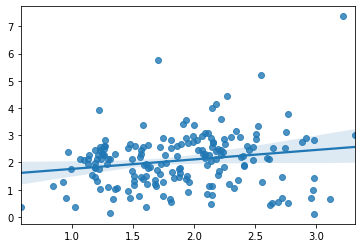

In [119]:
sns.regplot(Original_TOC,results_y,fit_reg=True)